In [ ]:
import numpy as np
import pandas as pd
import random as rd
from google.colab import files
import matplotlib.pyplot as plt
import networkx as nx 
import time
from scipy.sparse.csgraph import minimum_spanning_tree

In [ ]:
# please run to upload a solution
instance = files.upload()

TypeError: ignored

# Parsing

## Parser les instances de type "grille"

In [ ]:
def parse(instance, size):
  Data = list(instance.values())[0].splitlines()
  M = np.full((size,size,2),-1)
  for line in range(len(Data)-2):
    char = 0
    Line = str(Data[line+2])
    while char < len(Line):
      if Line[char] == "(":
        char +=2
        i = Line[char-1]
        while Line[char] != ",":
          i+=Line[char]
          char+=1
        char+=2
        j = Line[char-1]
        while Line[char] != ")":
          j+=Line[char]
          char+=1
      char+=1
    i,j=int(i),int(j)
    M[i,j,0] = -2
  i,acc = 0,0
  while i < size:
    j = 0
    while j < size:
      if M[i,j,0] != -2:
        M[i,j,0] = acc
        acc += 1
      j += 1
    i += 1
  L = []
  for i in range(size):
    for j in range(size):
      if M[i,j,0] != -2:
        l = [-1]
        for d in range(1,4):
          V = voisinage(i,j,size,d)
          Acc = [M[i,j,0]]
          for v in V:
            if M[v[0],v[1],0] != -2:
              Acc.append(M[v[0],v[1],0])
          l.append(Acc)
        l.append(0)
        l.append([i,j])
        L.append(l)
  return L

  #M[i,j] contient 2 valeurs: la première vaut -2 si la cible n'existe pas,
  # -1 si la cible n'est pas captée et hors de portée d'un capteur
  #et sinon contient le nombre de fois que la cible est captée. 
  #La deuxième valeur vaut -1 s'il n'y a pas de capteur et 1 si elle en contient un.

In [ ]:
L = parse(instance,10)
L[0]

UnboundLocalError: ignored

## Parser les instances de type "aléatoire"

In [ ]:
def parse_random(instance):
  list_cibles = []
  lines = list(instance.values())[0].splitlines()
  for e in lines:
    line = str(e).split(' ')
    if line[4][-1] == "'":
      line[4] = line[4][:-1]
    if line[4][-1] == ";":
      line[4] = line[4][:-1]
    list_cibles.append([[float(line[3]),float(line[4])],-1,0])
  return list_cibles

Graph = parse_random(instance)

def adjacency_matrix(Graph, Dcom, Dcapt):
  Adjcom, Adjcapt = np.zeros((len(Graph),len(Graph))), np.zeros((len(Graph),len(Graph)))
  for i in range(len(Graph)):
    for j in range(len(Graph)):
      distance = np.sqrt((Graph[i][0][0]-Graph[j][0][0])**2 + (Graph[i][0][1]-Graph[j][0][1])**2)
      if distance<=Dcom:
        Adjcom[i,j] = 1
      if distance<=Dcapt:
        Adjcapt[i,j] = 1
  return Adjcom, Adjcapt
Adjcom, Adjcapt = adjacency_matrix(Graph,2,2)

# liste_cibles contient une liste de points, avec pour chacun :
# ses coordonnes [x,y]
# -1 ou 1 selon qu'un capteur y est place ou non,
# un entier indiquant combien de fois la cible est captee

def parse_voisins(Graph):
  """
  return une liste avec a l'emplacement i : liste[i][0]=-1 ou 1 selon si il y a un capteur ou pas
  liste[i][1] = [capteurs a distance 1]
  idem pour 2 et 3
  liste[i][4] = k le nombre de captations de la cible
  liste[i][5] = [x,y] les coordonnees de l'element
  """
  liste_coord = []
  for i in range(len(Graph)):
    liste_liste_voisins = [-1]
    for dist in range(1,4):
      liste_voisins = [] # liste temporaire
      for j in range(len(Graph)):
        distance = np.sqrt((Graph[i][0][0]-Graph[j][0][0])**2 + (Graph[i][0][1]-Graph[j][0][1])**2)
        if distance<=dist:
          liste_voisins.append(j)
      liste_liste_voisins.append(liste_voisins)
    liste_liste_voisins.append(0)
    liste_liste_voisins.append(Graph[i][0])
    liste_coord.append(liste_liste_voisins)
  return liste_coord

L = parse_voisins(Graph)
print(L)


[[-1, [0, 38, 81, 408], [0, 38, 81, 89, 96, 314, 359, 368, 408, 423, 433, 573, 618, 789, 792], [0, 28, 38, 58, 81, 89, 96, 211, 271, 277, 294, 295, 305, 314, 359, 368, 376, 407, 408, 423, 433, 443, 467, 515, 537, 573, 617, 618, 640, 652, 660, 729, 765, 789, 792, 856, 880], 0, [0.0, 0.0]], [-1, [1, 213, 343, 363, 398, 405, 460, 554, 555, 651, 657, 682, 687, 755, 866], [1, 15, 27, 35, 44, 72, 88, 133, 141, 148, 161, 172, 179, 213, 219, 246, 249, 260, 302, 316, 319, 329, 331, 343, 362, 363, 364, 390, 398, 400, 403, 405, 411, 415, 422, 429, 448, 452, 460, 470, 475, 480, 554, 555, 563, 581, 592, 647, 651, 657, 668, 675, 682, 687, 714, 734, 744, 755, 764, 783, 810, 820, 866, 869, 887], [1, 15, 21, 27, 35, 44, 63, 72, 84, 88, 90, 122, 132, 133, 134, 135, 141, 148, 159, 161, 171, 172, 179, 194, 197, 199, 210, 213, 219, 237, 246, 249, 253, 255, 256, 260, 280, 293, 302, 307, 316, 319, 323, 329, 331, 333, 343, 346, 362, 363, 364, 387, 390, 398, 400, 403, 405, 410, 411, 415, 422, 425, 428, 429, 43

# Représentation


In [ ]:
# Uniquement pour les instances de type "grille"
capteur_matrix = M[:,:,1]
captage_matrix = M[:,:,0]
plt.matshow(capteur_matrix)
plt.matshow(captage_matrix)
plt.show()

NameError: ignored

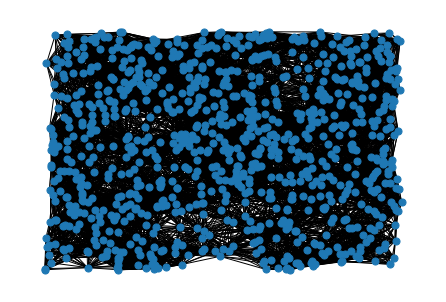

In [ ]:
# Uniquement pour les instances de type "aleatoire"
G = nx.from_numpy_matrix(np.array(Adjcom-np.eye(len(Adjcom))))  # on enlève les flèches de soi vers soi
pos = {}
for i in range(len(Graph)):
  pos[i] = Graph[i][0]
nx.draw(G, pos, with_labels=False, node_size=50)

# Majorant


## Arbre couvrant

Majorant = K* 837


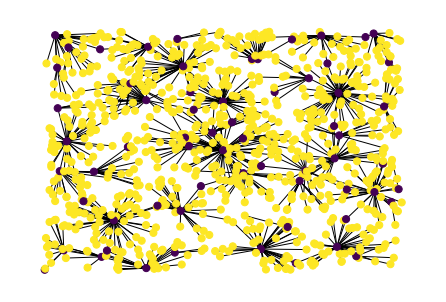

In [ ]:
# On calcule l'arbre couvrant de poids minimal sur le graphe d'adjascence de Communication
Tcsr = minimum_spanning_tree(Adjcom-np.eye(len(Adjcapt)))
Tcsr = Tcsr.toarray().astype(int)


# retirer les feuilles de degre 1, i.e. les sommets relies a un seul autre sommet
color_node = [1]*len(Tcsr)
for i in range(len(Tcsr)):
  if Tcsr.sum(axis=1)[i] + Tcsr.sum(axis=0)[i] > 1: # feuilles de l'arbre
    color_node[i] = 0

# representation
G = nx.from_numpy_matrix(Tcsr)
for i in range(len(Graph)):
  pos[i] = Graph[i][0]
nx.draw(G, pos, node_color=color_node, with_labels=False, node_size=50)

print("Majorant = K*",sum(color_node))

## Solution Admissible Gloutonne


In [ ]:
def voisinage(i,j,size,dist,Grid = True):
  if Grid:  
    Voisins=[]
    Voisins.append([i-1,j])
    Voisins.append([i+1,j])
    Voisins.append([i,j+1])
    Voisins.append([i,j-1])
    if dist > 1:
      Voisins.append([i-1,j-1])
      Voisins.append([i+1,j-1])
      Voisins.append([i-1,j+1])
      Voisins.append([i+1,j+1])
      Voisins.append([i-2,j])
      Voisins.append([i+2,j])
      Voisins.append([i,j+2])
      Voisins.append([i,j-2])
    if dist > 2:
      Voisins.append([i-2,j-1])
      Voisins.append([i+2,j-1])
      Voisins.append([i-2,j+1])
      Voisins.append([i+2,j+1])
      Voisins.append([i-1,j-2])
      Voisins.append([i+1,j-2])
      Voisins.append([i-1,j+2])
      Voisins.append([i+1,j+2])
      Voisins.append([i-2,j-2])
      Voisins.append([i+2,j+2])
      Voisins.append([i-2,j+2])
      Voisins.append([i+2,j-2])
      Voisins.append([i-3,j])
      Voisins.append([i+3,j])
      Voisins.append([i,j+3])
      Voisins.append([i,j-3])
    VoisinsValides = []
    for V in Voisins:
      if V[0] >=0 and V[0] < size and V[1] >=0 and V[1] < size :
        VoisinsValides.append(V)
  else:
    VoisinsValides = []
    for j in range(len(adj[0])):
      if adj[i,j] == 1:
        VoisinsValides.append(j)
  return VoisinsValides
print
def placeCapt_grid(M,n,i,j,dcapt,dcomm):
  if dcapt != dcomm:
    Vcomm = voisinage(i,j,n,dcomm)
    for x in Vcomm:
      if M[x[0],x[1],0] != -2:
        M[x[0],x[1],0] = max(0,M[x[0],x[1],0])
    Vcapt = voisinage(i,j,n,dcapt)
    for x in Vcapt:
      if M[x[0],x[1],0] != -2:
        M[x[0],x[1],0] = M[x[0],x[1],0] + 1
  else:
    V = voisinage(i,j,n,dcapt)
    for x in V:
      if M[x[0],x[1],0] != -2:
        M[x[0],x[1],0] = max(0,M[x[0],x[1],0]) + 1
  M[i,j,0] = max(0,M[i,j,0]) + 1
  M[i,j,1] = 1

def placeCapt(L,i,dcapt):
  L[i][0] = 1
  for j in L[i][dcapt]:
    L[j][4] += 1

def enleveCapt_grid(M,n,i,j,dcapt,dcomm):
  if M[i,j,1] == 0:
    return "Pas de capteur sur cette cible"
  M[i,j,1] = -1
  Vcapt = voisinage(i,j,n,dcapt)
  Vcomm = voisinage(i,j,n,dcomm)
  Vcapt.append([i,j])
  Vcomm.append([i,j])
  for V in Vcomm:
    if M[V[0],V[1],0] != -2:
      vcomm = voisinage(V[0],V[1],n,dcomm)
      vcomm.append([V[0],V[1]])
      found = False
      for v in vcomm:
        if M[v[0],v[1],0] != -2:       #cible existante
          if M[v[0],v[1],1] == 1:      #il y a un capteur qui peut communiquer
            if V in Vcapt:             #on enlève 1 si la cible était captée
              M[V[0],V[1],0] -= 1
            found = True
            break
      if not found:
        M[V[0],V[1],0] = -1          #aucun capteur ne peut communiquer

def enleveCapt(L,i,dcapt):
  L[i][0] = -1
  for j in L[i][dcapt]:
    L[j][4] -= 1

def placeCapt_glouton_grid(M,dcapt,dcomm,k):
    n = len(M[0])
    kacc = M[0,0,0]
    Vmax = 0
    CaptMax = []
    for i in range(n):
      for j in range(n):
        if M[i,j,0] != -2:
          kacc = min(kacc,M[i,j,0])
        Vacc = 0
        if M[i,j,0] >= 0 and M[i,j,1] != 1 and (i,j) != (0,0):
          Voisins = voisinage(i,j,n,dcapt)
          for x in  Voisins:
            if M[x[0],x[1],0] < k:
              Vacc += 1
        if Vacc == Vmax:
          CaptMax.append([i,j])
        if Vacc > Vmax:
          Vmax = Vacc
          CaptMax = [[i,j]]
    kmin = kacc
    if kmin < k:
      capt = CaptMax[rd.randint(0,len(CaptMax)-1)]
      placeCapt_grid(M,n,capt[0],capt[1],dcapt,dcomm)
    return kmin

def placeCapt_glouton(L,dcapt,dcomm,k):
  n = len(L)
  kacc = L[1][4]
  Vmax = 0
  CaptMax = []
  for i in range(1,n):
    kacc = min(kacc,L[i][4])
    Vacc = 0
    Valide, Connexe = (L[i][0] == -1), False
    if Valide:
      for j in L[i][dcomm]:
        Connexe = Connexe or L[j][0] == 1
    if Connexe:
      for j in L[i][dcapt]:
        if L[j][4] < k:
          Vacc +=1
    if Vacc == Vmax:
      CaptMax.append(i)
    if Vacc > Vmax:
      Vmax = Vacc
      CaptMax = [i]
  kmin = kacc
  if kmin < k:
    capt = CaptMax[rd.randint(0,len(CaptMax)-1)]
    placeCapt(L,capt,dcapt)
  return kmin
    

def enleveCapt_glouton_grid(M,dcapt,dcomm,k):
  n = len(M[0])
  Vmin = k+1
  CaptMin = []
  for i in range(n):
    for j in range(n):
      if M[i,j,1] == 1:
        Vcapt = voisinage(i,j,n,dcapt)
        kacc = n*n
        for V in Vcapt:
          if M[V[0],V[1],0] != -2:
            kacc = min(M[V[0],V[1],0],kacc)
        if kacc >= Vmin:
          Vcomm = voisinage(i,j,n,dcomm)
          connexite = True
          for V in Vcomm:
            if M[V[0],V[1],1] == 1:
              vcomm = voisinage(V[0],V[1],n,dcomm)
              commacc = 0
              for v in vcomm:
                if M[v[0],v[1],1] == 1:
                  commacc += 1
              connexite = connexite and (commacc > 1)
          if connexite:
            if kacc > Vmin:
              Vmin = kacc
              CaptMin = [[i,j]]
            else:
              CaptMin.append([i,j])
  if CaptMin == []:
    return k
  else:
    capt = rd.randint(0,len(CaptMin)-1)
    enleveCapt_grid(M,n,CaptMin[capt][0],CaptMin[capt][1],dcapt,dcomm)
    return Vmin

def enleveCapt_glouton(L,dcapt,dcomm,k):
  n = len(L)
  Vmin = k+1
  CaptMin = []
  for i in range(1,n):
    if L[i][0] == 1:
      kacc = n*n
      for j in L[i][dcapt]:
        kacc = min(kacc,L[j][4]) 
      if kacc >= Vmin:
        connexite = True
        for V in L[i][dcomm]:
          if L[V][0] == 1:
            commacc = 0
            for v in L[V][dcomm]:
              if L[v][0] == 1:
                commacc += 1
            connexite = connexite and (commacc > 2)
        if connexite:
          if kacc > Vmin:
            Vmin = kacc
            CaptMin = [i]
          else:
            CaptMin.append(i)
  if CaptMin == []:
    return k
  else:
    capt = CaptMin[rd.randint(0,len(CaptMin)-1)]
    enleveCapt(L,capt,dcapt)
    return Vmin


#L'idée de la fonction est la suivante: compter le nombre de composantes connexes
#du graphe. S'il n'y en a qu'une, pas besoin de continuer. Sinon, on compare les
#voisinages de ces composantes connexes. Si deux composantes connexes ont un 
#voisin en commun, on ajoute ce voisin et on fusionne les deux composantes.
#Dans le cas ou cela n'est pas suffisant à fusionner toutes les composantes, on 
#étudie les voisins à deux de distance, ce qui suffit à fusionner toutes les composantes.
def repair_connex_grid(M,n,dcapt,dcomm,repair = True):
  Capt = captors_grid(M,True)
  Connex = []
  ConnexAcc = []
  Queue = []
  V = voisinage(0,0,n,dcomm)
  for v in V:
    if M[v[0],v[1],1] == 1:
      Queue.append(v)
  while len(Queue) > 0:
    x = Queue.pop(0)
    ConnexAcc.append(x)
    V = voisinage(x[0],x[1],n,dcomm)
    for v in V:
      if ((v != [0,0]) and ((v in ConnexAcc) == False) and ((v in Queue) == False) and (M[v[0],v[1],1] == 1)):
        Queue.append(v)
  if len(ConnexAcc) == len(Capt):
    return True
  if len(ConnexAcc) != len(Capt):
    if repair == False:
      for i in range(n):
        for j in range(n):
          if (i,j) != (0,0) and (M[i,j,1] != 1) and (M[i,j,0] != -2):
            placeCapt_grid(M,n,i,j,dcapt,dcomm)
      return False
    Capt2 = []
    for c in Capt:
      if c in ConnexAcc == False:
        Capt2.append(c)
    Connex.append(ConnexAcc)
    ConnexAcc = []
    Capt = Capt2
    while len(Capt) > 0:
      Queue = [Capt[0]]
      while len(Queue) > 0:
        x = Queue.pop(0)
        V = voisinage(x[0],x[1],n,dcomm)
        for v in V:
          if (v in ConnexAcc or v in Queue or M[v[0],v[1],1] == 0) == False:
           Queue.append(v)
        ConnexAcc.append(x)
      Capt2 = []
      for c in Capt:
        if c in ConnexAcc == False:
          Capt2.append(c)
      Connex.append(ConnexAcc)
      ConnexAcc = []
      Capt = Capt2
    Voisins = [[] for i in range(len(Connex))]
    for i in range(len(Connex)):
      for x in Connex[i]:
        V = voisinage(x[0],x[1],n,dcomm)
        for v in V:
          if v in Voisins[i] == False:
            Voisins[i].append(x)
    i = 0
    while i < len(Connex):
      j = i+1
      while j < len(Connex):
        for x in Voisins[i]:
          if x in Voisins[j]:
            placeCapt_grid(M,n,x[0],x[1],dcapt,dcomm)
            Connex[i] = Connex[i]+Connex.pop(j)
            Voisins[i] = Voisins[i]+Voisins.pop(j)
            j -= 1
            break
        j += 1
    if len(Connex) > 1:
      Voisins2 = [[]for i in range(len(Voisins))]
      for i in range(len(Voisins)):
        for x in Voisins[i]:
          V = voisinage(x[0],x[1],n,dcomm)
          for v in V:
            Voisins2[i].append([v,x])
      i = 0
      while i < len(Connex):
        j = i+1
        while j < len(Connex):
          for x in Voisins2[i]:
            if x[0] in Voisins[j]:
              placeCapt_grid(M,n,x[0][0],x[0][1],dcapt,dcomm)
              placeCapt_grid(M,n,x[1][0],x[1][1],dcapt,dcomm)
              Connex[i] = Connex[i]+Connex.pop(j)
              Voisins[i] = Voisins[i]+Voisins.pop(j)
              Voisins2[i] = Voisins2[i]+Voisins.pop(j)
              j -=1
              break
          j += 1

def repair_connex(L,dcapt,dcomm,repair = True):
  Capt = captors(L,True)
  Connex = []
  ConnexAcc = []
  Queue = []
  V = L[0][dcomm].copy()
  V.pop(0)
  for v in V:
    if L[v][0] == 1:
      Queue.append(v)
  while len(Queue) > 0:
    x = Queue.pop(0)
    ConnexAcc.append(x)
    V = L[x][dcomm]
    for v in V:
      if v != 0 and ((v in ConnexAcc) == False) and ((v in Queue) ==False) and (L[v][0] == 1):
        Queue.append(v)
  if len(ConnexAcc) == len(Capt):
    return True
  if len(ConnexAcc) != len(Capt):
    if repair == False:
      for i in range(1,len(L)):
        if L[i][0] == 0:
          placeCapt(L,i,dcapt)
      return False
    Capt2 = []
    for c in Capt:
      if c in ConnexAcc == False:
        Capt2.append(c)
    Connex.append(ConnexAcc)
    ConnexAcc = []
    Capt = Capt2
    while len(Capt) > 0:
      Queue = [Capt[0]]
      while len(Queue) > 0:
        x = Queue.pop(0)
        V = L[x][dcomm]
        ConnexAcc.append(x)
        for v in V:
          if (v in ConnexAcc or v in Queue or M[v[0],v[1],1] == 0) == False:
           Queue.append(v)
      Capt2 = []
      for c in Capt:
        if c in ConnexAcc == False:
          Capt2.append(c)
      Connex.append(ConnexAcc)
      ConnexAcc = []
      Capt = Capt2
    Voisins = [[] for i in range(len(Connex))]
    for i in range(len(Connex)):
      for x in Connex[i]:
        V = L[x][dcomm]
        for v in V:
          if v in Voisins[i] == False:
            Voisins[i].append(x)
    i = 0
    print(len(Connex))
    while i < len(Connex):
      j = i+1
      while j < len(Connex):
        for x in Voisins[i]:
          if x in Voisins[j]:
            placeCapt(L,x,dcapt)
            Connex[i] = Connex[i]+Connex.pop(j)
            Voisins[i] = Voisins[i]+Voisins.pop(j)
            j -= 1
            break
        j += 1
    if len(Connex) > 1:
      Voisins2 = [[]for i in range(len(Voisins))]
      for i in range(len(Voisins)):
        for x in Voisins[i]:
          V = L[x][dcomm]
          for v in V:
            Voisins2[i].append([v,x])
      i = 0
      while i < len(Connex):
        j = i+1
        while j < len(Connex):
          for x in Voisins2[i]:
            if x[0] in Voisins[j]:
              placeCapt_grid(L,x[0],dcapt)
              placeCapt_grid(L,x[1],dcapt)
              Connex[i] = Connex[i]+Connex.pop(j)
              Voisins[i] = Voisins[i]+Voisins.pop(j)
              Voisins2[i] = Voisins2[i]+Voisins.pop(j)
              j -=1
              break
          j += 1
          


def calcule_borneinf(M,dcapt,k):
  n = len(M[0])
  nonvide = -1
  for i in range(n):
    for j in range(n):
      if M[i,j,0] != -2:
        nonvide+=1
  couverture = nonvide * k
  if dcapt == 1:
    aire = 5
  if dcapt == 2:
    aire = 13
  if dcapt == 3:
    aire = 29
  return int(couverture/aire)+1

def build_glouton_grid(M,dcapt,dcomm,k):
  n = len(M[0])
  #Mise du premier capteur
  i,j = rd.randint(0,n-1),rd.randint(0,n-1)
  while M[i,j,0] == -2 or (i,j) == (0,0):
    i,j = rd.randint(0,n-1),rd.randint(0,n-1)
  #Initialisation des voisins du premier capteur
  placeCapt_grid(M,n,i,j,dcapt,dcomm)
  #Boucle pour installer les capteurs suivants
  kmin=0
  iter = 0
  while kmin < k:
    kmin = placeCapt_glouton_grid(M,dcapt,dcomm,k)
    iter+=1
  Vpuit = voisinage(0,0,n,dcomm)
  Vacc = 0
  for x in Vpuit:
    Vacc = max(Vacc,M[x[0],x[1],1])
  if Vacc == 0:
    capt = Vpuit[rd.randint(0,len(Vpuit)-1)]
    placeCapt_grid(M,n,capt[0],capt[1],dcapt,dcomm)
  return M

def build_glouton(L,dcapt,dcomm,k):
  n = len(L)
  i = rd.randint(1,n-1)
  placeCapt(L,i,dcapt)
  kmin = 0
  iter = 0
  while kmin < k:
    kmin = placeCapt_glouton(L,dcapt,dcomm,k)
    iter += 1
  Vacc = 0
  for j in L[0][dcomm]:
    Vacc = max(Vacc,L[j][0])
  if Vacc == 0:
    placeCapt(L,L[0][dcomm][rd.randint(1,len(L[0][dcomm])-1)],dcapt)
  return L

def size(L):
  xmax,ymax = 0,0
  for v in L:
    xmax,ymax = max(xmax,v[5][0]),max(ymax,v[5][1])
  return max(int(xmax) + 1, int(ymax) + 1)

def captors_grid(M,List = False):
  if List:
    Capt = []
    for i in range(len(M[0])):
      for j in range(len(M[0])):
        if M[i,j,1] == 1:
          Capt.append([i,j])
    return Capt
  capt = 0
  for i in range(len(M[0])):
    for j in range(len(M[0])):
      if M[i,j,1] == 1:
        capt += 1
  return capt

def captors(L,List = False):
  if List:
    Capt = []
    for i in range(len(L)):
      if L[i][0] == 1:
        Capt.append(i)
    return Capt
  capt = 0
  for i in L:
    if i[0] == 1:
      capt +=1
  return capt

In [ ]:
L = parse_voisins(parse_random(instance))
print(size(L))
L2 = build_glouton(L,2,3,3)
#for x in L2:
  #print(x[4])

7
22


# Métaheuristique
On applique le suffixe "grid" lorsque la fonction s'applique spécifiquement aux instances sous forme de grille


In [ ]:
# on trouvera dans cette cellule les fonction de manipulation des populations
def generate_pop_grid(instance,n,N,dcapt,dcomm,k):
  M0 = parse(instance,n)
  Pop = []
  for i in range(N):
    Pop.append(build_glouton(M0.copy(),dcapt,dcomm,k))
  print(Pop[0][0][3])
  return Pop

def generate_pop(instance,N,dcapt,dcomm,k):
  L0 = parse_voisins(parse_random(instance))
  Pop = []
  for i in range(N):
    Pop.append(build_glouton(L0.copy(),dcapt,dcomm,k))
  return Pop

def chromosome_line_grid(n,nchr):
  Chr = [[] for i in range(nchr)]
  for i in range(n):
    for j in range(n):
      Chr[int(i*nchr/n)].append([i,j])
  return Chr

def chromosome_column_grid(n,nchr):
  Chr = [[]for i in range(nchr)]
  for i in range(n):
    for j in range(n):
      Chr[int(j*nchr/n)].append([i,j])
  return Chr

def chromosome_square_grid(n,sqrtnchr):
  Chr = [[] for i in range(sqrtnchr * sqrtnchr)]
  for i in range(n):
    for j in range(n):
      Chr[int(i*sqrtnchr/n)*sqrtnchr+int(j*sqrtnchr/n)].append([i,j])
  return Chr

def chromosome_line(L,nchr):
  n = size(L)
  Chr = [[]for i in range(nchr)]
  for i in range(len(L)):
    Chr[int(L[i][5][1]*nchr/n)].append(i)
  return Chr

def chromosome_column(L,nchr):
  n = size(L)
  Chr = [[]for i in range(nchr)]
  for i in range(len(L)):
    Chr[int(L[i][5][0]*nchr/n)].append(i)
  return Chr

def chromosome_square(L,sqrtnchr):
  n = size(L)
  Chr = [[]for i in range(sqrtnchr*sqrtnchr)]
  for i in range(len(L)):
    Chr[int(L[i][5][0]*sqrtnchr/n)*sqrtnchr+int(L[i][5][1]*sqrtnchr/n)].append(i)
  return Chr

def cross_grid(M1,M2,Chr,dcapt,dcomm):
  nchr = len(Chr)
  n = len(M1[0])
  Cross = [rd.randint(1,2)for i in range(nchr)]
  M3 = np.zeros_like(M1)
  for k in range(nchr):
    for v in Chr[k]:
      if Cross[k] == 1:
        i,j,capt = v[0],v[1],M1[v[0],v[1],1]
        if capt == -2:
          M3[v[0],v[1],1] = -2
        elif capt == 1:
          placeCapt_grid(M3,n,i,j,dcapt,dcomm)
      else:
        i,j,capt = v[0],v[1],M2[v[0],v[1],1]
        if capt == -2:
          M3[v[0],v[1],1] = -2
        elif capt == 1:
          placeCapt_grid(M3,n,i,j,dcapt,dcomm)
  return M3

def cross(L1,L2,Chr,dcapt,dcomm):
  nchr = len(Chr)
  n = len(L1)
  Cross = [rd.randint(1,2) for i in range(nchr)]
  L3 = []
  for i in range(n):
    L3.append([0,L1[i][1],L1[i][2],L1[i][3],0,L1[i][5]])
  for k in range(nchr):
    for i in Chr[k]:
      if Cross[k] == 1:
        if L1[i][0] == 1:
          placeCapt(L3,i,dcapt)
      else:
        if L2[i][0] == 1:
          placeCapt(L3,i,dcapt)
  return L3

def select_grid(Pop,N):
  Scores = []
  for i in range (len(Pop)):
    Scores.append([captors_grid(Pop[i]),i])
  Scores.sort()
  Pop2 = []
  for i in range(N):
    Pop2.append(Pop[Scores[i][1]])
  return Pop2

def select(Pop,N):
  Scores = []
  for i in range(len(Pop)):
    Scores.append([captors(Pop[i]),i])
  Scores.sort()
  Pop2 = []
  for i in range(N):
    Pop2.append(Pop[Scores[i][1]])
  return Pop2

In [ ]:
# main() fonction qui fait tout mais ne marche que pour les grilles : 
def Meta_grid(instance,n,N,T,nchr,dcapt,dcomm,k):
  """
  input: 
  N->int: taille d'une generation
  T->int: nombre de generations
  nchr->int: doit etre un carre parfait, nombre de chromosomes
  """
  Pop = generate_pop_grid(instance,n,N,dcapt,dcomm,k)
  Chr = chromosome_square(Pop[0],nchr)
  smin = captors(Pop[0])
  for i in range(1,len(Pop)):
    smin = min(smin,captors(Pop[i]))
  for t in range(T):
    New_Pop = []
    for i in range(N):
      for j in range(N):
        L = cross(Pop[i],Pop[j],Chr,dcapt,dcomm)
        if i != j:
          kmin = n*n
          for x in range(1,len(L)):
            kmin = min(kmin,L[x][4])
          while kmin < k:
            kmin = placeCapt_glouton(L,dcapt,dcomm,k)
          #print("a",kmin)
          kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
          #print("b",kmin)
          while kmin > k:
            kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
           # print(kmin)
          repair_connex(L,dcapt,dcomm,False)
        New_Pop.append(L)
    Pop = select(New_Pop,N)
  return smin,captors(Pop[0]),Pop[0]

# main() fonction, qui fait tout :
def Meta(instance,N,T,nchr,dcapt,dcomm,k):
  """
  input: 
  N->int: taille d'une generation
  T->int: nombre de generations
  nchr->int: doit etre un carre parfait, nombre de chromosomes
  """
  L = parse_voisins(parse_random(instance))
  Chr = [chromosome_square(L,nchr),chromosome_column(L,nchr*nchr)]
  Pop = generate_pop(instance,N,dcapt,dcomm,k)
  smin = captors(Pop[0])
  for i in range(1,len(Pop)):
    smin = min(smin,captors(Pop[0]))
  for t in range(T):
    New_Pop = []
    for i in range(N):
      for j in range(N):
        if t% 2 == 0:
          M = cross(Pop[i],Pop[j],Chr[0],dcapt,dcomm)
        else:
          M = cross(Pop[i],Pop[j],Chr[1],dcapt,dcomm)
        kmin = len(L)
        for x in range(1,len(L)):
          kmin = min(kmin,L[x][4])
        while kmin < k:
          kmin = placeCapt_glouton(L,dcapt,dcomm,k)
        kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
        while kmin > k:
          kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
        repair_connex(L,dcapt,dcomm,False)
        New_Pop.append(L)
    Pop = select(New_Pop,N)
    #for M in Pop:
    #  print(captors_grid(M))
    #print (captors(Pop[0]))
  return smin,captors(Pop[0]),Pop[0]

#Fonction alternative pour l'heuristique ouverte
def Meta2(instance,N,T,nchr,dcapt,dcomm,k):
  L = parse_voisins(parse_random(instance))
  Chr = [chromosome_square(L,nchr),chromosome_column(L,nchr*nchr)]
  Pop0 = generate_pop(instance,(T+1)*int(N/2),dcapt,dcomm,k)
  print(len(Pop0))
  Pop = [Pop0[i] for i in range(N)]
  smin = captors(Pop[0])
  for i in range(1,len(Pop)):
    smin = min(smin,captors(Pop[0]))
  for t in range(T):
    New_Pop = []
    for i in range(N):
      for j in range(N):
        if t% 2 == 0:
          M = cross(Pop[i],Pop[j],Chr[0],dcapt,dcomm)
        else:
          M = cross(Pop[i],Pop[j],Chr[0],dcapt,dcomm)
        kmin = len(L)
        for x in range(1,len(L)):
          kmin = min(kmin,L[x][4])
        while kmin < k:
          kmin = placeCapt_glouton(L,dcapt,dcomm,k)
        kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
        while kmin > k:
          kmin = enleveCapt_glouton(L,dcapt,dcomm,k)
        repair_connex(L,dcapt,dcomm,False)
        New_Pop.append(L)
    Pop = select(New_Pop,int(N/2))
    if t != T-1:
      for i in range(int(N/2)):
        Pop.append(Pop0[(t+2)*int(N/2)+i])
    #for M in Pop:
    #  print(captors_grid(M))
    #print (captors(Pop[0]))
  return smin,captors(Pop[0]),Pop[0]

In [ ]:
# ajoute ici par praticite
instance = files.upload()

Saving captANOR150_7_4.dat to captANOR150_7_4 (4).dat


In [ ]:
# cette cellule permet de "run" le code et de voir les resultats :
ListParams = [[1,1,1],[1,2,1],[2,2,1],[2,3,1],[1,1,2],[1,2,2],[2,2,2],[2,3,2],[1,1,3],[1,2,3],[2,2,3],[2,3,3]]
Scores = []
Sols = []
for i in range(len(ListParams)):
  t = time.time()
  P = Meta_grid(instance,n = 10, N = 10, T = 10,nchr = 5,dcapt = ListParams[i][0], dcomm = ListParams[i][1], k = ListParams[i][2])
  Scores.append([P[0],P[1],time.time()-t])
  Sols.append(P[2])
  print(ListParams[i])
print(Scores)

UnboundLocalError: ignored

In [ ]:
#Meta_grid(instance,10,10,5,5,2,3,3)
Sols[-1]

[[0,
  [0, 10, 1],
  [0, 10, 1, 11, 20, 2],
  [0, 10, 1, 11, 20, 2, 21, 12, 22, 30, 3],
  3,
  [0, 0]],
 [0,
  [1, 11, 2, 0],
  [1, 11, 2, 0, 10, 12, 21, 3],
  [1, 11, 2, 0, 10, 12, 21, 3, 20, 22, 13, 23, 31, 4],
  3,
  [0, 1]],
 [0,
  [2, 12, 3, 1],
  [2, 12, 3, 1, 11, 13, 22, 4, 0],
  [2, 12, 3, 1, 11, 13, 22, 4, 0, 21, 23, 10, 14, 24, 20, 32, 5],
  2,
  [0, 2]],
 [1,
  [3, 13, 4, 2],
  [3, 13, 4, 2, 12, 14, 23, 5, 1],
  [3, 13, 4, 2, 12, 14, 23, 5, 1, 22, 24, 11, 15, 25, 21, 33, 6, 0],
  1,
  [0, 3]],
 [0,
  [4, 14, 5, 3],
  [4, 14, 5, 3, 13, 15, 24, 6, 2],
  [4, 14, 5, 3, 13, 15, 24, 6, 2, 23, 25, 12, 16, 26, 22, 34, 7, 1],
  2,
  [0, 4]],
 [0,
  [5, 15, 6, 4],
  [5, 15, 6, 4, 14, 16, 25, 7, 3],
  [5, 15, 6, 4, 14, 16, 25, 7, 3, 24, 26, 13, 17, 27, 23, 8, 2],
  2,
  [0, 5]],
 [0,
  [6, 16, 7, 5],
  [6, 16, 7, 5, 15, 17, 26, 8, 4],
  [6, 16, 7, 5, 15, 17, 26, 8, 4, 25, 27, 14, 18, 28, 24, 9, 3],
  2,
  [0, 6]],
 [0,
  [7, 17, 8, 6],
  [7, 17, 8, 6, 16, 18, 27, 9, 5],
  [7, 17, 8, 6,

In [ ]:
ListParams = [[1,1,1],[1,2,1],[2,2,1],[2,3,1],[1,1,2],[1,2,2],[2,2,2],[2,3,2],[1,1,3],[1,2,3],[2,2,3],[2,3,3]]
Scores = []
Sols = []
for i in range(len(ListParams)):
  t = time.time()
  P = Meta(instance, N = 10, T = 10,nchr = 9,dcapt = ListParams[i][0], dcomm = ListParams[i][1], k = ListParams[i][2])
  Scores.append([P[0],P[1],time.time()-t])
  Sols.append(P[2])
  print(ListParams[i])
print(Scores)

[1, 1, 1]
[1, 2, 1]
[2, 2, 1]
[2, 3, 1]
[1, 1, 2]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[1, 1, 3]
[1, 2, 3]
[2, 2, 3]
[2, 3, 3]
[[43, 28, 0.7490179538726807], [30, 21, 0.9485914707183838], [17, 8, 0.7196903228759766], [17, 8, 0.8025000095367432], [56, 43, 0.7669944763183594], [50, 44, 1.6472430229187012], [23, 15, 0.8659343719482422], [23, 13, 1.0091686248779297], [70, 65, 1.3334941864013672], [74, 64, 2.485579252243042], [27, 20, 1.0588457584381104], [28, 18, 1.275437831878662]]


In [ ]:
Sols[-1]

[[-1,
  [0, 71],
  [0, 20, 34, 39, 44, 67, 71, 86, 88, 95, 116, 119, 126],
  [0,
   1,
   15,
   20,
   34,
   39,
   40,
   44,
   48,
   67,
   71,
   79,
   86,
   88,
   93,
   95,
   96,
   109,
   116,
   119,
   123,
   125,
   126,
   130,
   145],
  2,
  [0.0, 0.0]],
 [-1,
  [1, 67, 95, 109, 123, 125, 130],
  [1,
   13,
   15,
   16,
   34,
   48,
   65,
   67,
   71,
   95,
   96,
   97,
   98,
   109,
   119,
   123,
   125,
   126,
   130,
   145],
  [0,
   1,
   9,
   13,
   15,
   16,
   18,
   20,
   23,
   26,
   29,
   34,
   39,
   40,
   42,
   44,
   47,
   48,
   49,
   56,
   65,
   66,
   67,
   68,
   71,
   72,
   79,
   84,
   86,
   88,
   93,
   95,
   96,
   97,
   98,
   99,
   106,
   109,
   116,
   119,
   123,
   125,
   126,
   130,
   145],
  3,
  [0.01, 2.15]],
 [-1,
  [2, 18, 36, 42, 47, 56, 135],
  [2,
   7,
   9,
   14,
   18,
   23,
   26,
   29,
   32,
   33,
   36,
   42,
   47,
   56,
   61,
   65,
   68,
   72,
   77,
   80,
   97,
   98,
  

In [ ]:
Scores = []
Sols = []
for i in range(len(ListParams)):
  t = time.time()
  P = Meta_grid(instance,n = 10, N = 10, T = 0,nchr = 10,dcapt = ListParams[i][0], dcomm = ListParams[i][1], k = ListParams[i][2])
  Scores.append([P[0],P[1],time.time()-t])
  Sols.append(P[2])
  print(ListParams[i])
print(Scores)

[1, 1, 1]
[1, 2, 1]
[2, 2, 1]
[2, 3, 1]
[1, 1, 2]
[1, 2, 2]
[2, 2, 2]
[2, 3, 2]
[1, 1, 3]
[1, 2, 3]
[2, 2, 3]
[2, 3, 3]
[[47, 47, 0.011963844299316406], [34, 34, 0.009801626205444336], [26, 26, 0.013240814208984375], [20, 20, 0.010015249252319336], [56, 56, 0.011088132858276367], [56, 56, 0.01299595832824707], [33, 33, 0.01115727424621582], [31, 31, 0.012743234634399414], [77, 77, 0.012070894241333008], [72, 72, 0.013698339462280273], [43, 43, 0.012269020080566406], [40, 40, 0.013187408447265625]]
